In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors, linear_model
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("column_2C.dat", sep=" ", header=None)
df.columns = ['x1','x2','x3','x4','x5','x6','CAT']
df['CAT'].unique()


array(['AB', 'NO'], dtype=object)

/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


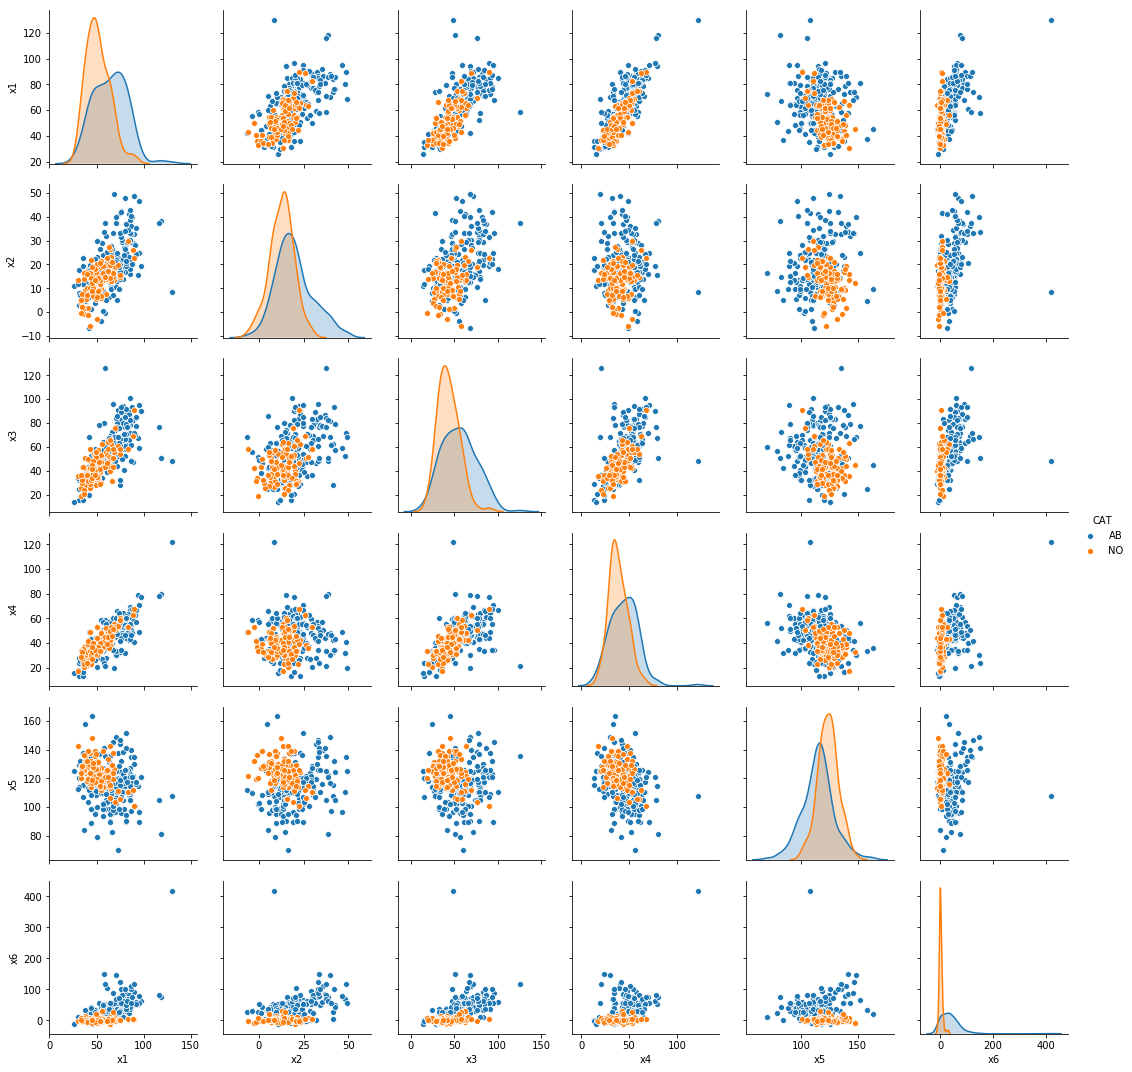

In [2]:
#B i: Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
display(sns.pairplot(df, hue="CAT"))

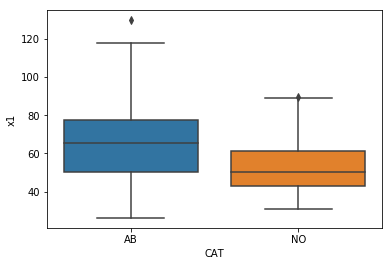

In [3]:
#B ii: Make boxplots for each of the independent variables. Use color to show Classes 0 and 1
bp1 = sns.boxplot(x="CAT", y="x1",data= df)
display(bp1)

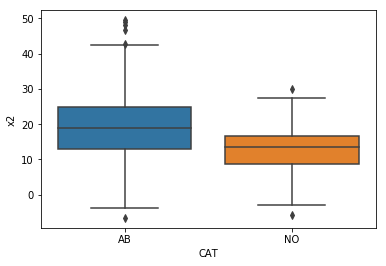

In [4]:
bp2 = sns.boxplot(x="CAT", y="x2",data= df)
display(bp2)

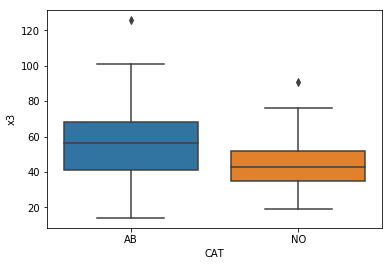

In [5]:
bp3 = sns.boxplot(x="CAT", y="x3",data= df)
display(bp3)

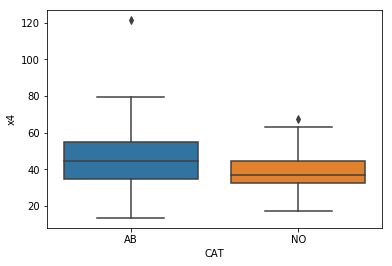

In [6]:
bp4 = sns.boxplot(x="CAT", y="x4",data= df)
display(bp4)

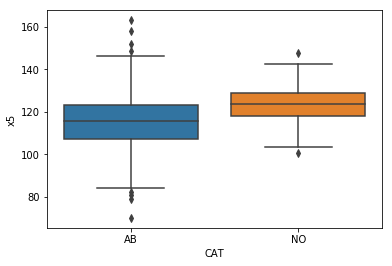

In [7]:
bp5 = sns.boxplot(x="CAT", y="x5",data= df)
display(bp5)

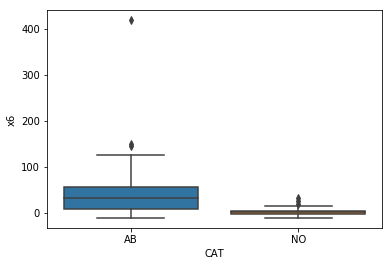

In [8]:
bp6 = sns.boxplot(x="CAT", y="x6",data= df)
display(bp6)

In [9]:
#Change the label notation to numerical
df['CAT'] = df['CAT'].map({'AB': 1, 'NO': 0})

#B iii: Split Data Set into two parts: Traing Set and Test Set
df_1 = df[df['CAT'] == 1].iloc[0:140, :]
df_0 = df[df['CAT'] == 0].iloc[0:70, :]
df_tr = pd.concat([df_0, df_1], axis=0)
df_1 = df[df['CAT'] == 1].iloc[140:,:]
df_0 = df[df['CAT'] == 0].iloc[70:,:]
df_val = pd.concat([df_0, df_1], axis=0)
X_train = df_tr.drop("CAT", 1)
y_train = df_tr['CAT']
X_val = df_val.drop("CAT", 1)
y_val = df_val['CAT']

#Create Minimum Error Rate List:
lomr=[]

#C i:
def knn_function(k_size,tr_fea,tr_lab,te_fea,te_lab,weights='uniform', p=2, metric='minkowski', metric_params=None):
    optimal_k = 0
    opt_accuracy = 0
    train_error = []
    test_error = []
    for i in k_size:
        knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights= weights, p=p, metric=metric, metric_params=metric_params)
        knn.fit(tr_fea.values, tr_lab.values)
        accuracy_te = knn.score(te_fea.values, te_lab.values)
        test_error.append(1 - accuracy_te)
        accuracy_tr = knn.score(tr_fea.values, tr_lab.values)
        train_error.append(1 - accuracy_tr)
        if accuracy_te >= opt_accuracy:
            opt_accuracy = accuracy_te
            optimal_k = i
        else:
            pass

    min_error = 1 - opt_accuracy
    k_size=k_size
    return optimal_k,min_error,train_error,test_error,k_size

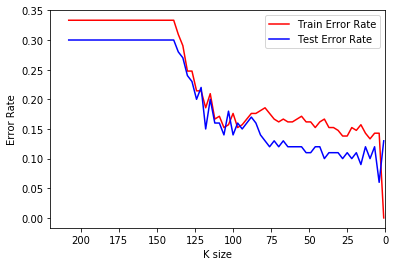

Minimum Error Rate: 0.06
Optimal K: 4


In [10]:
#C ii
optimal_k,min_error,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 210,3),tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val)
plt.plot(k_size, train_error, "r-", label="Train Error Rate")
plt.plot(k_size, test_error, "b-", label="Test Error Rate")
plt.xlabel("K size")
plt.ylabel("Error Rate")
plt.xlim(220,0)
plt.legend()
plt.show()
print("Minimum Error Rate: " + str(round(min_error, 4)))
print("Optimal K: " + str(optimal_k))
lomr.append(min(train_error))


In [11]:
knn_c_ii = neighbors.KNeighborsClassifier(n_neighbors=optimal_k)
knn_c_ii.fit(X_train.values, y_train.values)
yyy=knn_c_ii.predict(X_val.values)
conMat = confusion_matrix(y_val.values, yyy)
print(conMat)
TPR = conMat[1][1]/(conMat[1][1] + conMat[1][0])
print("True Positive Rate: " + str(round(TPR,4)))
TNR = conMat[0][0]/(conMat[0][0] + conMat[0][1])
print("True Negative Rate: " + str(round(TNR,4)))
print("Precision: " + str(round(precision_score(y_val.values, yyy), 4)))
print("F score: " + str(round(f1_score(y_val.values, yyy), 4)))
report_table = classification_report(y_val.values, yyy)
print(report_table)

[[25  5]
 [ 1 69]]
True Positive Rate: 0.9857
True Negative Rate: 0.8333
Precision: 0.9324
F score: 0.9583
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

   micro avg       0.94      0.94      0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



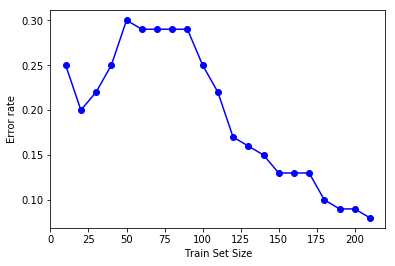

In [12]:
#C iii
tr_size = np.arange(10, 220, 10)
list_ter = []
# While changing the size of the train data set, the test data size is changin as well
for i in tr_size:
    no_size = int(i / 3)
    ab_size = i - no_size
    tr_data = df[df["CAT"] == 1].iloc[0:ab_size, :]
    tr_data_2 = df[df["CAT"] == 0].iloc[0:no_size, :]
    tr_data = pd.concat([tr_data, tr_data_2], 0)
    df_1 = df[df['CAT'] == 1].iloc[ab_size:, :]
    df_0 = df[df['CAT'] == 0].iloc[no_size:, :]
    te_data= pd.concat([df_0, df_1], axis=0)
    train_X = tr_data.drop("CAT", 1)
    train_Y = tr_data["CAT"]

    j = np.arange(1,i,5)
    optimal_k,min_error,train_error,test_error,k_size=knn_function(k_size=j,tr_fea=train_X,
                                                                   tr_lab=train_Y,te_lab=y_val,te_fea=X_val)
    list_ter.append(min_error)
    lomr.append(min(train_error))

plt.plot(tr_size,list_ter,'bo-')
plt.ylabel("Error rate")
plt.xlabel("Train Set Size")
plt.show()

In [13]:
#D iA
res = pd.DataFrame(columns=['Distance Metric', 'Error Rate'])
optimal_k_2,min_error_2,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                                            tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,p=1)
print("Optimal K: " + str(optimal_k_2))
print("Error Rate: " + str(round(min_error_2,4)))
res = res.append({"Distance Metric": "Manhattan Distance", "Error Rate": min_error_2},ignore_index= True)
lomr.append(min(train_error))


Optimal K: 26
Error Rate: 0.11


In [14]:
#D iB
opt_accuracy_3 = 0
opt_p = 0
list_of_p = np.arange(0.1,1.1,0.1)
for i in list_of_p:
    pp= 10**i
    knn = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_2, p=pp)
    knn.fit(X_train.values, y_train.values)
    accuracy = knn.score(X_val.values, y_val.values)
    tr_error= 1-knn.score(X_train.values,y_train.values)
    lomr.append(tr_error)
    if accuracy > opt_accuracy_3:
        opt_accuracy_3 = accuracy
        opt_p= i
    else:
        pass
print("Best log(p) :" + str(opt_p))
print("Error Rate: " + str(round(1-opt_accuracy_3,4)))
res=res.append({"Distance Metric": "Manhattan Distance at best log10(p)", "Error Rate": 1-opt_accuracy_3},
               ignore_index= True)
min_error_3= 1 - opt_accuracy_3

Best log(p) :0.1
Error Rate: 0.1


In [15]:
#D iC
optimal_k_4,min_error_4,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                                            tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,p=math.inf)
print("Optimal K : " + str(optimal_k_4))
print("Error Rate: " + str(round(min_error_4,4)))
res = res.append({"Distance Metric": "Chebyshev Distance", "Error Rate": min_error_4},ignore_index= True)
lomr.append(min(train_error))

Optimal K : 16
Error Rate: 0.08


In [16]:
#D ii
optimal_k_5,min_error_5,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                            tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,metric="mahalanobis", 
                            metric_params={'V': np.linalg.inv(np.cov(X_train.values.T))})
print("Optimal K:" + str(optimal_k_5))
res = res.append({"Distance Metric": "Mahalanobis Distance", "Error Rate": min_error_5},ignore_index= True)
print("Error Rate: " + str(round(min_error_5,4)))
lomr.append(min(train_error))

Optimal K:16
Error Rate: 0.08


In [17]:
display(res)

,Distance Metric,Error Rate
0,Manhattan Distance,0.11
1,Manhattan Distance at best log10(p),0.10
2,Chebyshev Distance,0.08
3,Mahalanobis Distance,0.08


In [18]:
#e Weighted Euclidean Distance:
optimal_k_6,min_error_6,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                                    tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,p=2,weights='distance')
print("Optimal K : " + str(optimal_k_6))
print("Error Rate: " + str(round(min_error_6,4)))
lomr.append(min(train_error))

Optimal K : 6
Error Rate: 0.1


In [19]:
#e) Weighted Manhattan Distance:
optimal_k_7,min_error_7,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                                    tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,p=1,weights='distance')
print("Optimal K : " + str(optimal_k_7))
print("Error Rate: " + str(round(min_error_7,4)))
lomr.append(min(train_error))


Optimal K : 26
Error Rate: 0.1


In [20]:
#e) Weighted Chebyshev Distance:
optimal_k_8,min_error_8,train_error,test_error,k_size=knn_function(k_size=np.arange(1, 200,5),
                                tr_fea=X_train,tr_lab=y_train,te_lab=y_val,te_fea=X_val,p=math.inf,weights='distance')
print("Optimal K : " + str(optimal_k_8))
print("Error Rate: " + str(round(min_error_8,4)))
lomr.append(min(train_error))


Optimal K : 61
Error Rate: 0.11


In [21]:
#f) Best Error Rate Achieved in this excersise:
print(min(np.round(lomr,4)))

0.0


                    Name: RUIFAN XU          STUDENT ID: 1995124351


    B i: Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
![png](output_1_2.png)


    B ii: Make boxplots for each of the independent variables. Use color to show Classes 0 and 1


![png](output_2_1.png)
![png](output_3_1.png)
![png](output_4_1.png)
![png](output_5_1.png)
![png](output_6_1.png)
![png](output_7_1.png)


    C) ii. Which k* is the most suitable k among those values?

    Minimum Error Rate: 0.06
    Optimal K: 4
    Confusion Matrix: [[25  5]
                       [ 1 69]]
    True Positive Rate: 0.9857
    True Negative Rate: 0.8333
    Precision: 0.9324
    F score: 0.9583
                  precision    recall  f1-score   support
    
               0       0.96      0.83      0.89        30
               1       0.93      0.99      0.96        70
    
       micro avg       0.94      0.94      0.94       100
       macro avg       0.95      0.91      0.93       100
    weighted avg       0.94      0.94      0.94       100
    
![png](output_9_0.png)



    C) iii. Plot the learning curve by changing training set size

![png](output_11_0.png)


    D) iA. Best k and test error at k = k* while using Manhattan Distance

    Optimal K: 26
    Error Rate: 0.11

    D) iB. What is the best log10(p) at k=k* in iA?

    Best log(p) :0.1
    Error Rate: 0.1

    D) iC. Best k and test error at k = k* while using Chebyshev Distance with p approach infinite

    Optimal K : 16
    Error Rate: 0.08

    D) ii. Best k and test error at k = k* while using Mahalanobis Distance

    Optimal K:16
    Error Rate: 0.08

    D) Summarize the test errors in a table


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Distance Metric</th>
      <th>Error Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Manhattan Distance</td>
      <td>0.11</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Manhattan Distance at best log10(p)</td>
      <td>0.10</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Chebyshev Distance</td>
      <td>0.08</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Mahalanobis Distance</td>
      <td>0.08</td>
    </tr>
  </tbody>
</table>
</div>



    E) Weighted Euclidean Distance:
    
    Optimal K : 6
    Error Rate: 0.1

    E) Weighted Manhattan Distance:

    Optimal K : 26
    Error Rate: 0.1

    E) Weighted Chebyshev Distance:

    Optimal K : 61
    Error Rate: 0.11


    F) Best Error Rate Achieved in this excersise:

    The lowest training error rate achieved in this exercise is error rate = 0.00.

